In [1]:
import cv2
import numpy as np
from skimage import morphology, draw
import numpy as np
import matplotlib.pyplot as plt

from utils.chromo_cv_utils import find_external_contours, cv_imread, cv_imwrite, contour_bbox_img

In [2]:
img_fp = r"E:\染色体测试数据\240227-zzlAI结果评估测试集选取圈状染色体测试骨架算法\OUTPUT_CHROMO\G2312256561.057.K\chromo_1-60_wbg-bbox.png"

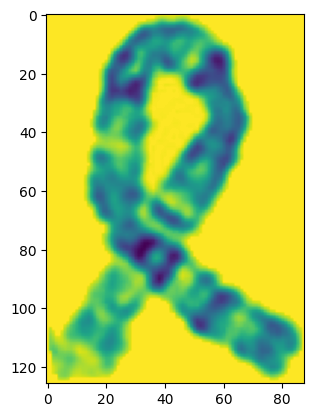

In [3]:
img = cv_imread(img_fp)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) if len(img.shape) == 3 else img
plt.imshow(img_gray)
plt.show()

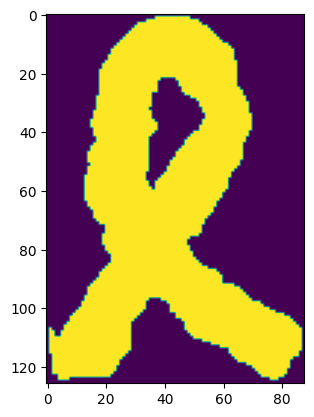

In [4]:
# guess proper bin threshold
adaptive_method = cv2.THRESH_BINARY_INV + cv2.THRESH_TRIANGLE
bin_thresh = 0
bin_thresh, _ = cv2.threshold(img_gray, bin_thresh, 255, adaptive_method)
# 根据经验值校正二值化阈值
bin_thresh = bin_thresh - 5
_, img_bin = cv2.threshold(img_gray, bin_thresh, 255, cv2.THRESH_BINARY_INV)
plt.imshow(img_bin)
plt.show()

In [5]:
# 查找轮廓和层级信息
contours, hierarchy = cv2.findContours(img_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# 求内轮廓
inner_cntrs = []
outer_cntrs = []
for i, cntr in enumerate(contours):
    if hierarchy[0][i][3] != -1:
        inner_cntrs.append(cntr)
    else:
        outer_cntrs.append(cntr)
len(inner_cntrs), len(outer_cntrs)

(1, 1)

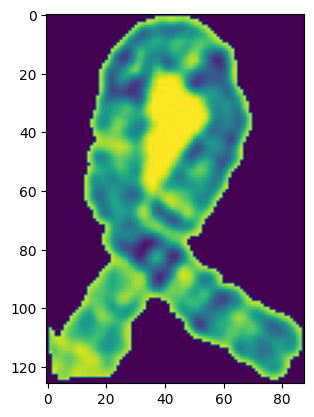

In [6]:
bbg_bbox, wbg_bbox = contour_bbox_img(img_gray, outer_cntrs[0])
plt.imshow(bbg_bbox)
plt.show()

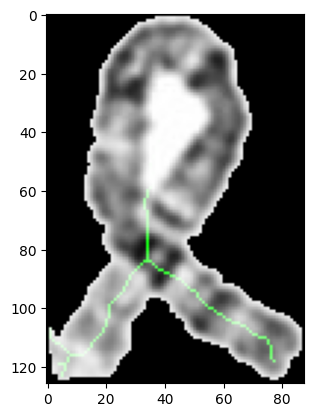

In [7]:
skeleton1 = morphology.skeletonize(bbg_bbox)

# 将骨架转换为RGB格式以便在彩色图像上显示
skeleton_rgb1 = np.zeros((skeleton1.shape[0], skeleton1.shape[1], 3), dtype=np.uint8)
skeleton_rgb1[skeleton1] = [0, 255, 0]  # 将骨架设置为绿色
bbg_bbox_color1 = cv2.cvtColor(bbg_bbox, cv2.COLOR_GRAY2BGR)

# 将骨架叠加到彩色图像上
img_overlay1 = np.where(skeleton_rgb1, skeleton_rgb1, bbg_bbox_color1)
plt.imshow(img_overlay1)
plt.show()

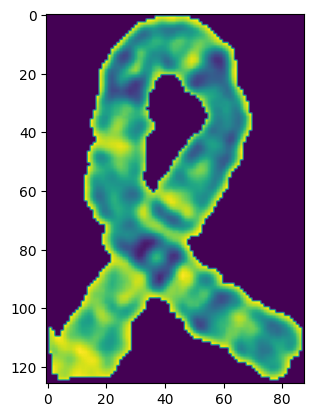

In [8]:
cv2.drawContours(bbg_bbox, inner_cntrs, -1, (0,0,0), -1)
plt.imshow(bbg_bbox)
plt.show()

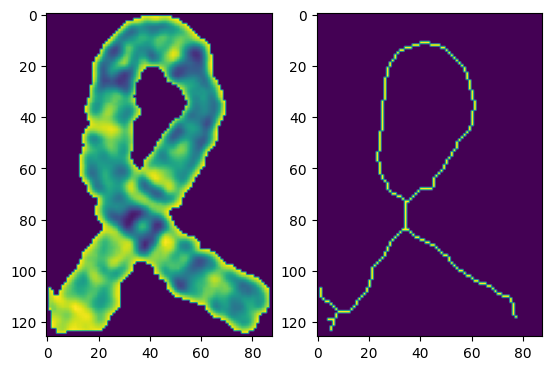

In [9]:
skeleton = morphology.skeletonize(bbg_bbox)
plt.subplot(121)
plt.imshow(bbg_bbox)
plt.subplot(122)
plt.imshow(skeleton)
plt.show()

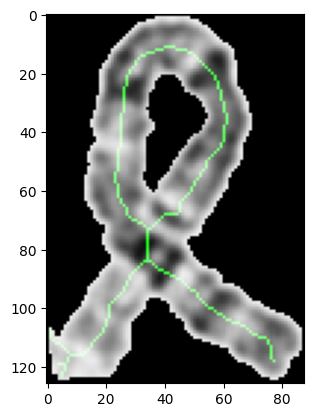

In [10]:
# 将骨架转换为RGB格式以便在彩色图像上显示
skeleton_rgb = np.zeros((skeleton.shape[0], skeleton.shape[1], 3), dtype=np.uint8)
skeleton_rgb[skeleton] = [0, 255, 0]  # 将骨架设置为绿色
bbg_bbox_color = cv2.cvtColor(bbg_bbox, cv2.COLOR_GRAY2BGR)

# 将骨架叠加到彩色图像上
img_overlay = np.where(skeleton_rgb, skeleton_rgb, bbg_bbox_color)
plt.imshow(img_overlay)
plt.show()

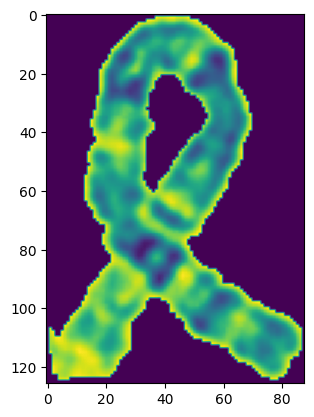

In [11]:
img_or = np.bitwise_or(bbg_bbox, skeleton)
plt.imshow(img_or)
plt.show()